In [3]:
%matplotlib inline
import numpy as np
import scipy as sci
import scipy.odr as odr
from scipy.optimize import curve_fit as cf
import pandas as pd
import matplotlib.pyplot as plt
import lmfit as lm

def dataToNpArray(data,line):
    return np.array(data.values[:,line]).astype(float)


## Alles Plotten

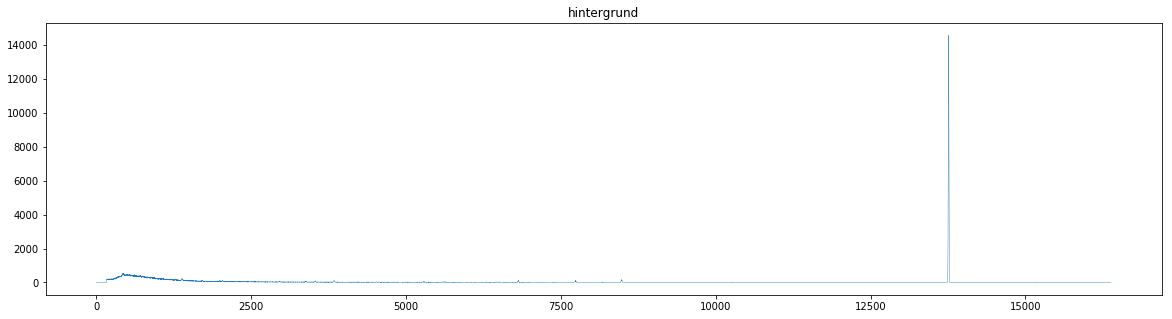

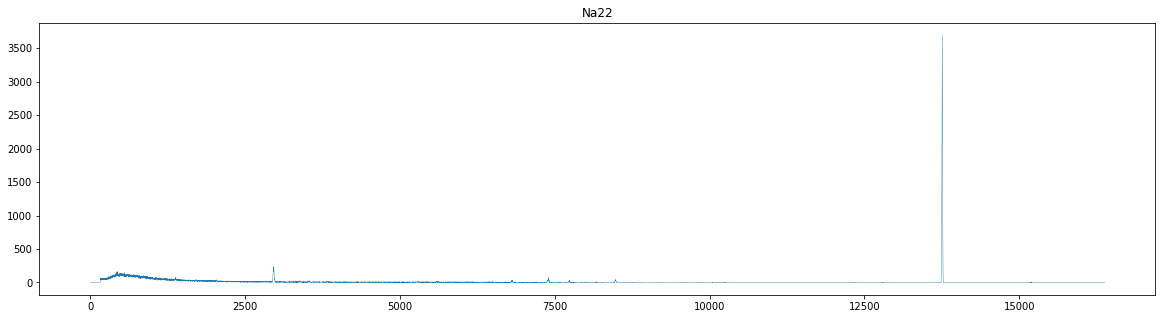

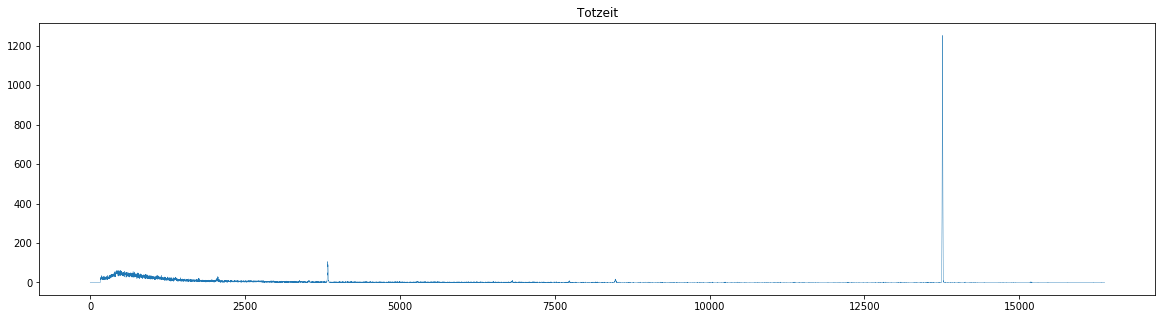

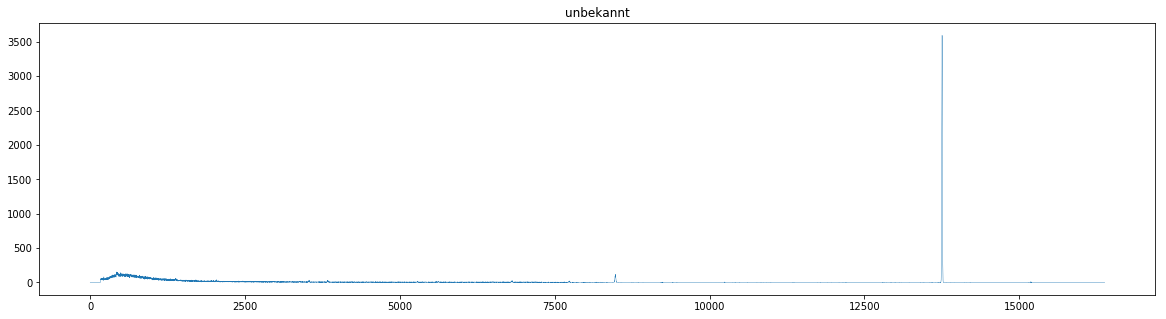

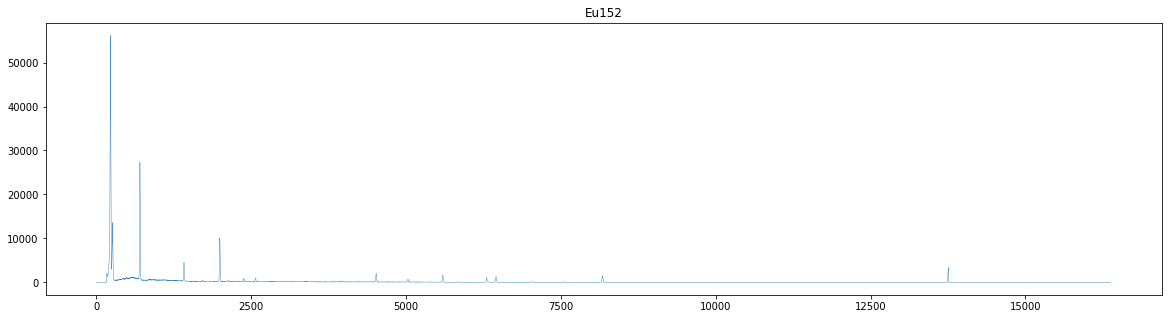

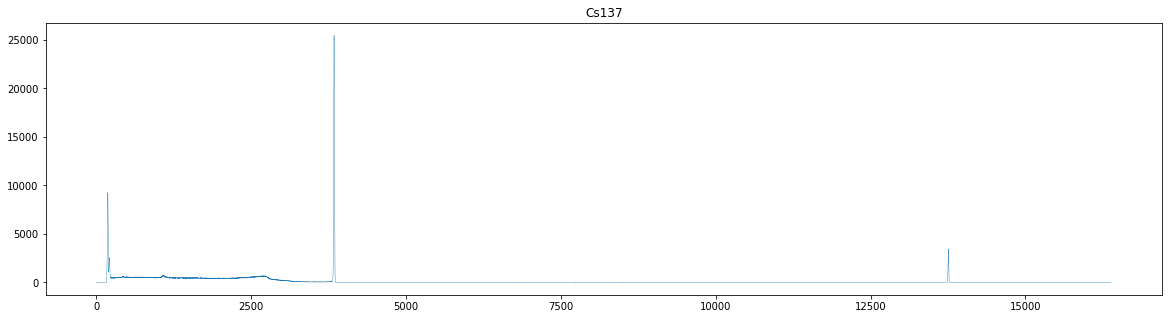

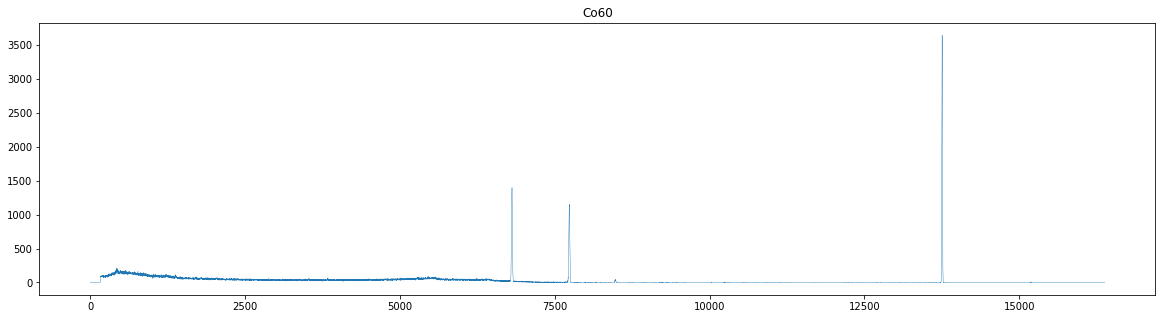

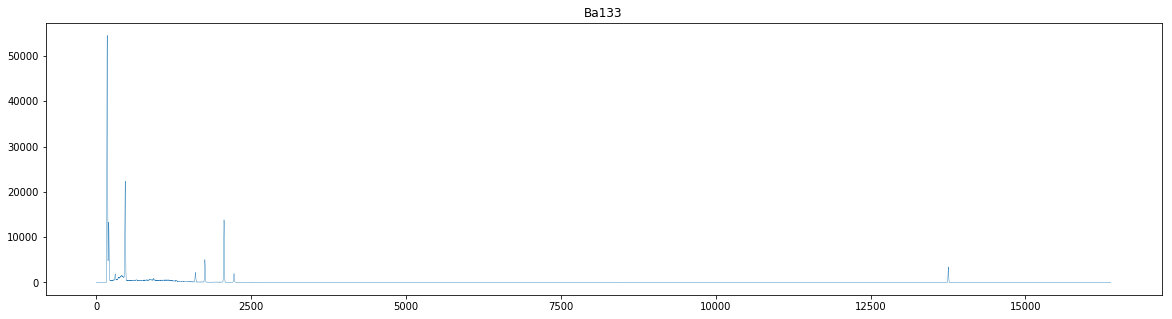

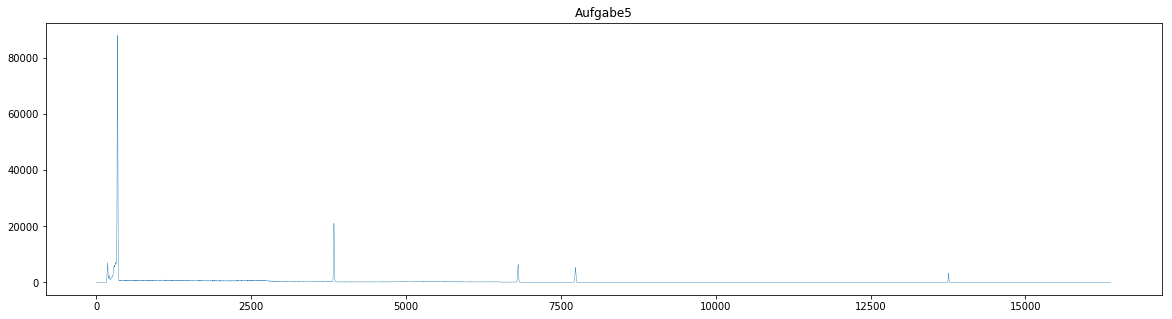

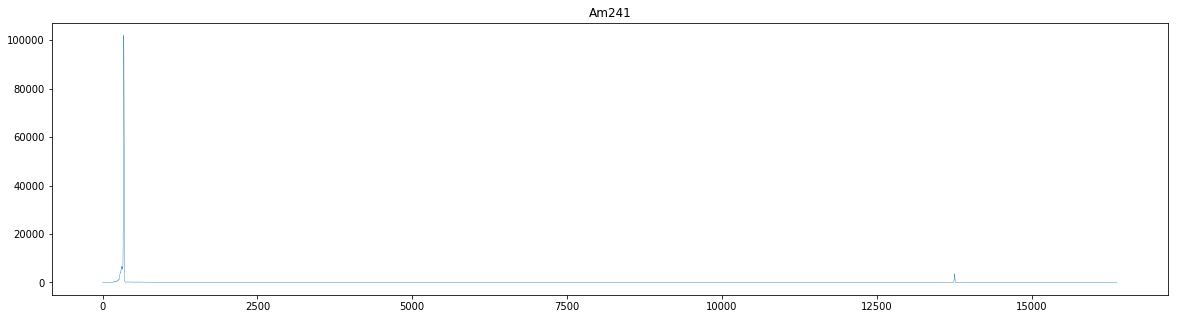

In [4]:
files=["hintergrund","Na22","Totzeit","unbekannt","Eu152","Cs137","Co60","Ba133","Aufgabe5","Am241"]
datalist=[]
messzeitList=[]
for file in files:
    name="SS18/Gr 23/{}.TKA".format(file)
    data=pd.read_table(name,skiprows=1)
    values=dataToNpArray(data,0)
    messzeitList.append(values[0])
    values=values[1:]
    datalist.append(values)
    fig,ax=plt.subplots(figsize=(20,5))
    ax.plot(range(len(values)),values,"-",lw=.4)
    #ax.semilogy()
    ax.set_title(file)

datadict=dict(zip(files,datalist))
messzeitdict=dict(zip(files,messzeitList))

# Totzeitkorrektur für alle Plots:

In [11]:
def findpeaks(data,minval, width,fit=True,plot=False,lower=0):
    """Sucht nach allen Peaks in einer Datei die größer sind als minval
    data: daten in denen gesucht wird
    minval: Ab diesem Wert wird es als Peak erkannt
    width: Breite links und rechts von minval des peaks
    fit: momentan egal
    plot: sollen die Daten geplottet werden? (default=True)
    
    
    returns: list[leftbound,righbound]
    """
    leftbound=-1
    rightbound=-1
    returnlist=[]
    for i in range(len(data)):
        #breite finden die größer ist als der angegebene wert

        if(data[i]>minval and leftbound==-1):
            leftbound=i-width+lower

        if(data[i]<minval and leftbound !=-1 and rightbound==-1):
            rightbound=i+width+lower
            

            returnlist.append([leftbound,rightbound])
            leftbound=-1
            rightbound=-1
    if(plot):
        for elms in returnlist:
            leftbound=elms[0]
            rightbound=elms[1]
            fig,ax=plt.subplots()
            ax.plot(range(leftbound,rightbound),values[leftbound:rightbound])
    if(fit):
        pass
    return returnlist


#Fit Model
def Gaus(x,mu,sigma,A,b):

    return(A*np.exp(-(x-mu)**2/(2*sigma**2))+b)

def calcAbsCounts(lower,upper,args):
    """Integriert über Gaus in den grenzen von lower und upper"""

    #integ=lambda x,mu,sigma,A,b:A*np.exp(-(x-mu)**2/(2*sigma**2))+b
    abscounts= sci.integrate.quad(Gaus,lower,upper,args=(*args[:3],0))
    return abscounts

['mu', 'sigma', 'A', 'b']
(179376.7496471286, 1.871291405339827e-07)
sum 179725.0
(44735.57793785137, 3.501532810413715e-08)
sum 44920.0
(14969.84891685911, 2.7381663124470602e-05)
sum 14966.0
(44769.342145091265, 0.0006406028437017948)
sum 44919.0
(42318.92294581969, 0.0005321042982976088)
sum 43009.0
(43338.069248524436, 0.00017514738458139996)
sum 43714.0
(44602.58461088264, 0.00063570058277075)
sum 44727.0
(43294.37911411941, 2.4519460722015146e-08)
sum 43772.0
(40794.04092917533, 0.0003515468076751861)
sum 42204.0
(43456.96619122518, 8.265887395903938e-05)
sum 44004.0


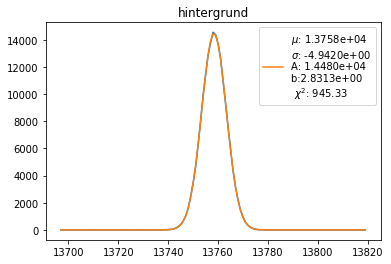

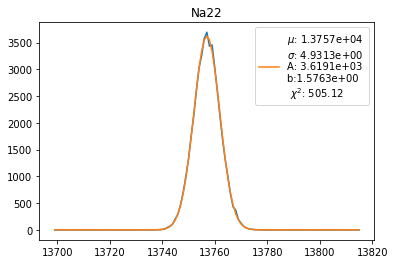

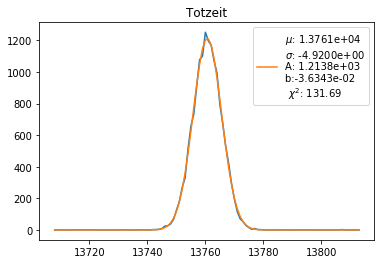

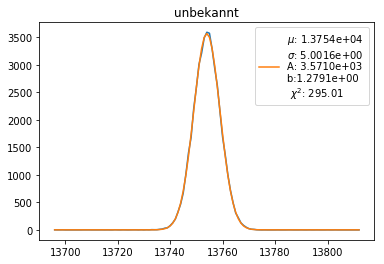

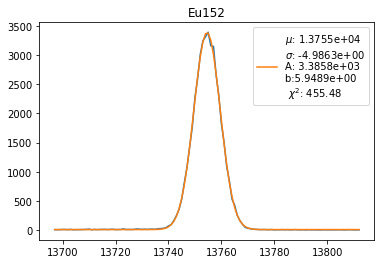

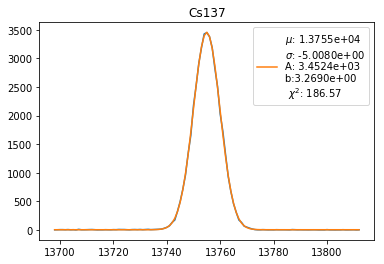

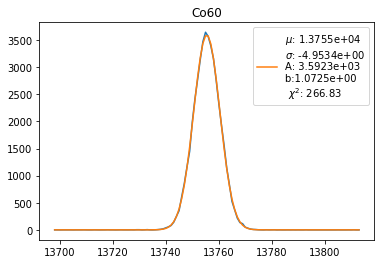

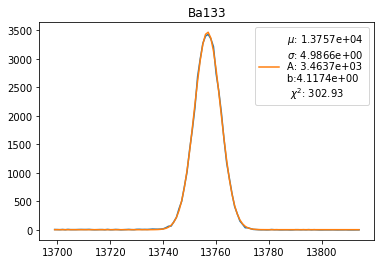

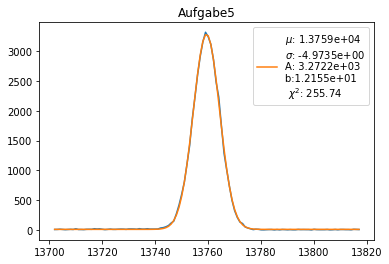

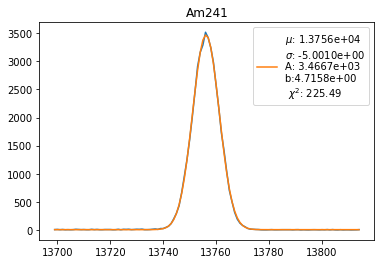

In [12]:
gmodel=lm.Model(Gaus)
print(gmodel.param_names)
params=gmodel.make_params(mu=13760,sigma=1,A=2,b=0)
fitvals=[]
for file in datadict:
    data=datadict[file]
    messzeit=messzeitdict[file]
    lower=13700
    upper=13800
    peakdata=data[lower:upper]

    bounds=findpeaks(peakdata,1000,50,fit=False,lower=lower)
    left,right=bounds[0]
    
    result=gmodel.fit(data[left:right],params,x=np.array(range(left,right)))
    best_fitvals=list(result.best_values.values())

    fitvals.append(best_fitvals)
    redchi=result.redchi#/result.best_values["sigma"]**2
    fig,ax=plt.subplots()
    #print(result.fit_report())
    ax.plot(np.array(range(left,right)),data[left:right])
    ax.set_title(file)
    ax.plot(np.array(range(left,right)),result.best_fit,c="C1",label="$\mu$: {:.4e} \n$\sigma$: {:.4e}\nA: {:.4e} \nb:{:.4e} \n $\chi^2$: {:.2f} ".format(*result.best_values.values(),redchi))
    ax.legend()
    abscounts=calcAbsCounts(left,right,best_fitvals)
    print(abscounts)
    print("sum",sum(data[left:right]))
#hier eine funktion schreiben die über die Gaußkurven integriert
